<a href="https://colab.research.google.com/github/akats16/CoronaVirusAnalysis/blob/master/ExploringCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Loading in various packages**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVR
from matplotlib.ticker import MaxNLocator

**2. Loading raw datasets from [Kaggle](https://www.kaggle.com/tags/covid19)**

Additionally, I created a dataset that explores how many confirmed, recovered, and death cases there are across the globe on January 22,2020 to March 26,2020

In [0]:
covidData = pd.read_csv('covid_19_data.csv')
confirmedCases = pd.read_csv('time_series_covid_19_confirmed.csv')
recoveredCases= pd.read_csv('time_series_covid_19_recovered.csv')
deathCases= pd.read_csv('time_series_covid_19_deaths.csv')
confirmedSub = confirmedCases[['Province/State', 'Country/Region', 'Lat', 'Long']]
locationCovid = pd.merge(covidData, confirmedSub, on=['Province/State','Country/Region'])

**Creating dataset that looks at death-rate vs recovery-rate globally**

In [3]:
firstDayConfirmed = confirmedCases.columns.str.startswith('1', na=False)
firstIndexConfirmed = int(next((i for i, j in enumerate(firstDayConfirmed) if j), None))

totalConfirmedPerDay = confirmedCases.iloc[:,firstIndexConfirmed:len(confirmedCases)].agg([sum])
total1 = totalConfirmedPerDay.append(recoveredCases.iloc[:,firstIndexConfirmed:len(confirmedCases)].agg([sum]))
totalCases = total1.append(deathCases.iloc[:,firstIndexConfirmed:len(confirmedCases)].agg([sum]))

totalCases = totalCases.transpose()
totalCases.columns = ['Confirmed', 'Recovered', 'Deaths']

totalCases['RecoveredRate'] = totalCases['Recovered']/totalCases['Confirmed']
totalCases['DeathRate'] = totalCases['Deaths']/totalCases['Confirmed']


totalCases.head()

,Confirmed,Recovered,Deaths,RecoveredRate,DeathRate
1/22/20,555,28,17,0.050450,0.030631
1/23/20,654,30,18,0.045872,0.027523
1/24/20,941,36,26,0.038257,0.027630
1/25/20,1434,39,42,0.027197,0.029289
1/26/20,2118,52,56,0.024551,0.026440


In [0]:
covidData.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
locationCovid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,36,01/22/2020,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0,36.0,138.0
1,74,01/23/2020,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0,36.0,138.0
2,120,01/24/2020,NaN,Japan,1/24/20 17:00,2.0,0.0,0.0,36.0,138.0
3,161,01/25/2020,NaN,Japan,1/25/20 17:00,2.0,0.0,0.0,36.0,138.0
4,207,01/26/2020,NaN,Japan,1/26/20 16:00,4.0,0.0,1.0,36.0,138.0


In [0]:
covidByDay = covidData.groupby(['ObservationDate'])[["Confirmed", "Deaths", "Recovered"]].sum()
covidByDay.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0


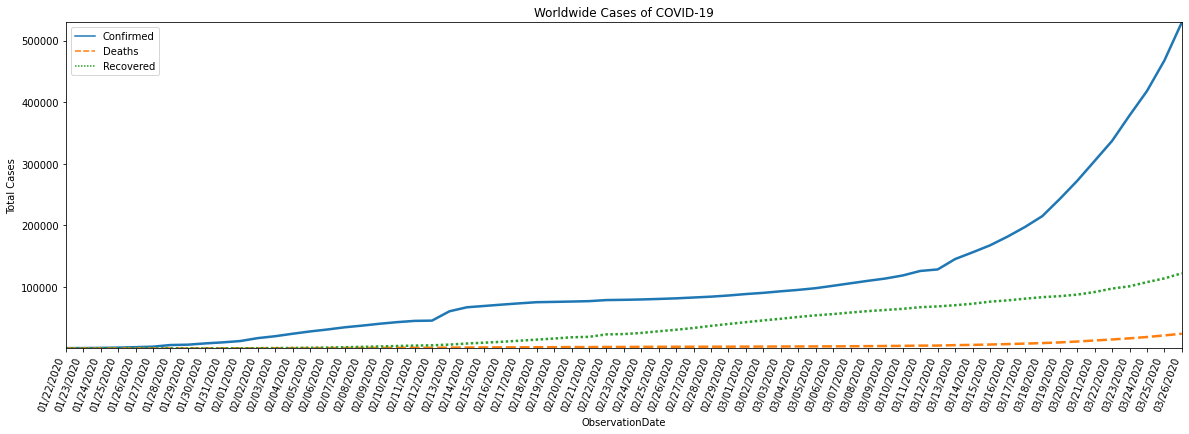

In [0]:
labels = covidByDay.index.get_level_values(0).values

plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=covidByDay, palette="tab10", linewidth=2.5)
ax.set_xticklabels(labels, rotation=70, horizontalalignment='right')
ax.set_ylabel('Total Cases')
ax.set_title('Worldwide Cases of COVID-19')
ax.margins(0)


ax

In [0]:
worldwide = px.density_mapbox(locationCovid, lat='Lat', lon='Long', hover_name='Country/Region', 
                  animation_frame='ObservationDate', zoom=0, radius=10, 
                  hover_data=['Confirmed','Recovered', 'Deaths'], mapbox_style="stamen-terrain", title='Worldwide Cases From 1-22-20 to 3-26-20')

worldwide.show()

Text(0.5, 1.0, 'Death Rate/ Day Globally')

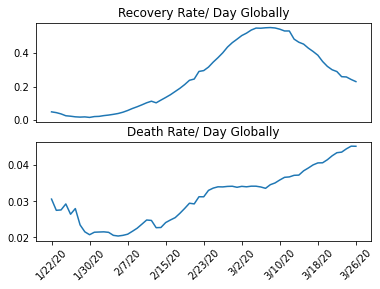

In [34]:
totalCases

plt.figure(1)
plt.subplot(211)
plt.plot(totalCases.index, totalCases['RecoveredRate'])
ax = plt.gca()
ax.set_title('Recovery Rate/ Day Globally')
plt.subplot(212)
plt.plot(totalCases.index, totalCases['DeathRate'])
plt.xticks(rotation=45)
locator = MaxNLocator(nbins=10)

ax2 = plt.gca()
ax2.xaxis.set_major_locator(locator)
ax2.set_title('Death Rate/ Day Globally')